## Problem Statement 3:
You are working in an e-commerce company, and your company has put forward a task to
analyze the customer reviews for various products. You are supposed to create a report that
classifies the products based on the customer reviews.

<AxesSubplot:xlabel='Score', ylabel='count'>

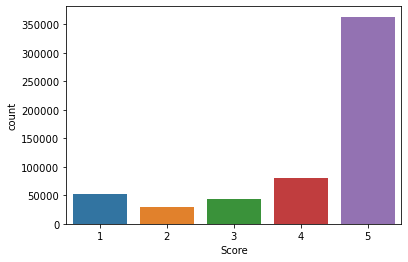

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
reviews_df = pd.read_csv('Reviews.csv')

# Explore the data
reviews_df.head()

# Check the shape of the data
reviews_df.shape

# Check for missing values
reviews_df.isnull().sum()

# Drop rows with missing values
reviews_df.dropna(inplace=True)

# Check the distribution of scores
sns.countplot(x='Score', data=reviews_df)



<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

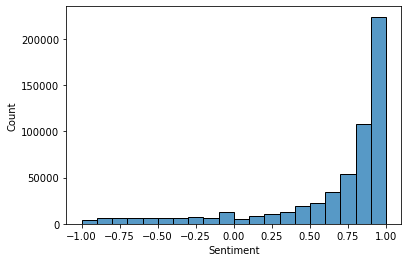

In [8]:
# Create a new column for sentiment analysis
sia = SentimentIntensityAnalyzer()
reviews_df['Sentiment'] = reviews_df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Check the distribution of sentiment scores
sns.histplot(x='Sentiment', data=reviews_df, bins=20)



<AxesSubplot:xlabel='Text_Length', ylabel='Count'>

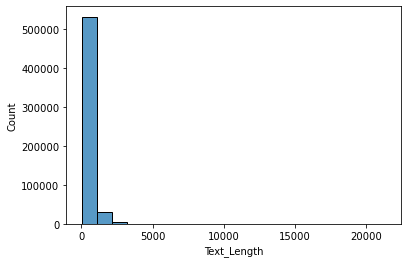

In [11]:
# Create a new column for the length of the review text
reviews_df['Text_Length'] = reviews_df['Text'].apply(lambda x: len(x))

# Check the distribution of review text lengths
sns.histplot(x='Text_Length', data=reviews_df, bins=20)



<AxesSubplot:xlabel='Sentiment_Class', ylabel='count'>

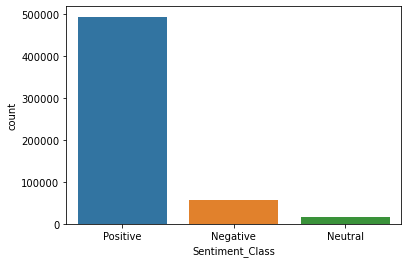

In [12]:
# Clean the review text data
lemmatizer = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w.isalpha() and w not in stopwords_set]
    return ' '.join(words)

reviews_df['Clean_Text'] = reviews_df['Text'].apply(clean_text)

# Classify reviews based on sentiment score
reviews_df['Sentiment_Class'] = np.where(reviews_df['Sentiment'] > 0.1, 'Positive', 
                                          np.where(reviews_df['Sentiment'] < -0.1, 'Negative', 'Neutral'))

# Check the distribution of sentiment classes
sns.countplot(x='Sentiment_Class', data=reviews_df)
